# Understanding Cosine Similarity

Have you ever wondered how search engines find documents similar to what you're looking for, or how recommendation systems suggest movies you might like? One of the key concepts behind these technologies is **Cosine Similarity**. In this notebook, we'll break down what cosine similarity is, why it's useful, and how you can compute it using Python.


## What is Cosine Similarity?

**Cosine Similarity** is a measure that calculates the similarity between two objects by measuring the cosine of the angle between them. Imagine two arrows pointing in different directions; the cosine of the angle between them tells us how similar their directions are.

- **Range:** The value ranges from -1 to 1.
  - **1:** Exactly the same direction.
  - **0:** Completely different directions.
  - **-1:** Exactly opposite directions.

In simpler terms, it's a way to measure how similar two things are based on their attributes.


## Why Use Cosine Similarity?

- **Text Analysis:** Determining how similar two documents are.
- **Recommendation Systems:** Suggesting products or movies based on user preferences.
- **Clustering:** Grouping similar items together.

It's especially useful when dealing with high-dimensional data, such as text data represented by word counts or TF-IDF vectors.


## How to Calculate Cosine Similarity

The formula for cosine similarity between two vectors **A** and **B** is:

$$
\text{Cosine Similarity} = \frac{A \cdot B}{\|A\| \times \|B\|}
$$

Where:

- \( A \cdot B \) is the dot product of vectors **A** and **B**.
- \( \|A\| \) is the magnitude (length) of vector **A**.
- \( \|B\| \) is the magnitude (length) of vector **B**.



Let's break this down with a simple example.


## A Simple Example

Suppose we have two vectors:

- **Vector A:** [1, 2, 3]
- **Vector B:** [4, 5, 6]

Let's calculate their cosine similarity step by step.


## How Exactly Are Dot Product and Magnitude Calculated?

### Dot Product


The **dot product** of two vectors is calculated by multiplying their corresponding components and then summing the results. This can be represented mathematically as follows:

For example, if we have two vectors:

* **Vector A:** `[a1, a2, a3]`
* **Vector B:** `[b1, b2, b3]`

The dot product `A ⋅ B` is calculated as:

```markdown
A ⋅ B = (a1 × b1) + (a2 × b2) + (a3 × b3)
```

So, it's simply multiplying each component from Vector A with the corresponding component in Vector B and then adding all the products together.

### Magnitude of a Vector


The **magnitude** (or length) of a vector is calculated by taking the square root of the sum of the squares of its components. This gives us the "length" of the vector in space.

For example, if we have **Vector A:** `[a1, a2, a3]`, the magnitude `‖A‖` is calculated as:

```markdown
‖A‖ = √(a1^2 + a2^2 + a3^2)
```

This is based on the Pythagorean theorem, where the magnitude represents the distance from the origin to the point defined by the vector.

**In Simple Terms:**

* **Dot Product**: Multiply corresponding components and sum them up.
* **Magnitude**: Square each component, sum them, and take the square root.

In [9]:
import numpy as np

# Define the vectors
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])

# Calculate the dot product
dot_product = np.dot(A, B)
print(f"Dot Product: {dot_product}")

# Calculate the magnitudes
magnitude_A = np.linalg.norm(A)
magnitude_B = np.linalg.norm(B)
print(f"Magnitude of A: {magnitude_A}")
print(f"Magnitude of B: {magnitude_B}")

# Calculate cosine similarity
cosine_similarity = dot_product / (magnitude_A * magnitude_B)
print(f"Cosine Similarity: {cosine_similarity}")


Dot Product: 32
Magnitude of A: 3.7416573867739413
Magnitude of B: 8.774964387392123
Cosine Similarity: 0.9746318461970762


## Visualizing Cosine Similarity

Let's visualize the vectors and the angle between them to get a better understanding.


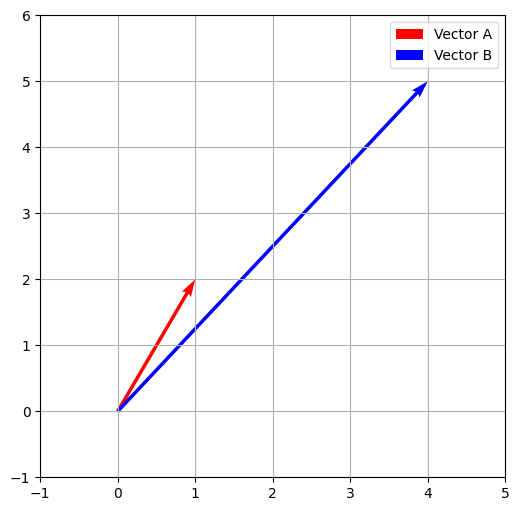

In [10]:
import matplotlib.pyplot as plt

# Function to plot vectors
def plot_vectors(vec1, vec2):
    plt.figure(figsize=(6,6))
    plt.quiver(0, 0, vec1[0], vec1[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector A')
    plt.quiver(0, 0, vec2[0], vec2[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector B')
    plt.xlim(-1, max(vec1[0], vec2[0]) + 1)
    plt.ylim(-1, max(vec1[1], vec2[1]) + 1)
    plt.grid()
    plt.legend()
    plt.show()

# For visualization, we'll use only the first two components
plot_vectors(A[:2], B[:2])


## Cosine Similarity in Text Analysis

One common application of cosine similarity is in text analysis, where documents are represented as vectors of word counts or TF-IDF scores. Let's see a simple example using text data.


,are,books,enjoy,for,fun,great,is,learning,love,machine,reading
Doc 1,0,0,0,0,0,0,0,1,1,1,0
Doc 2,0,0,0,0,1,0,1,1,0,1,0
Doc 3,0,1,1,0,0,0,0,0,0,0,1
Doc 4,1,1,0,1,0,1,0,1,0,0,0


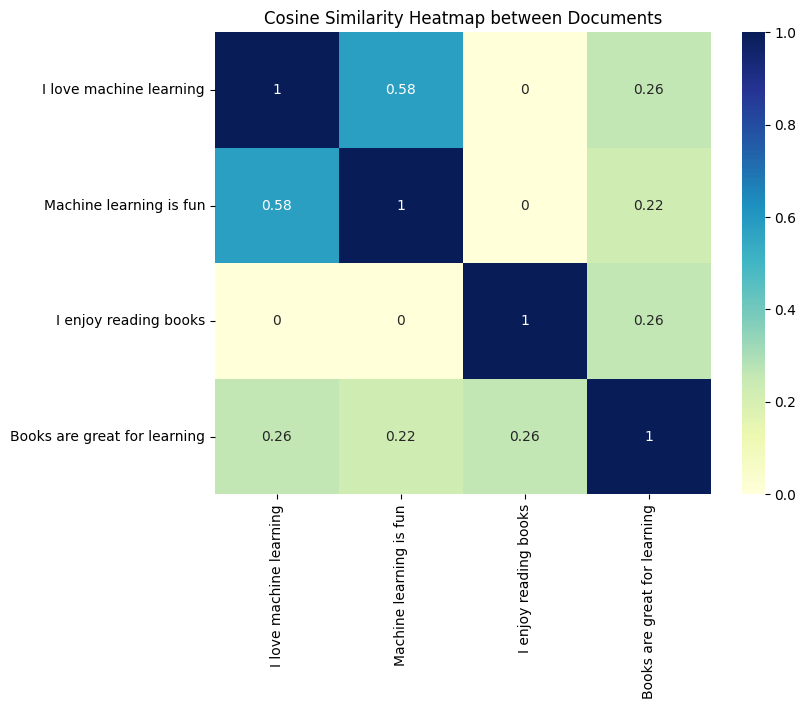

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Sample documents
documents = [
    "I love machine learning",
    "Machine learning is fun",
    "I enjoy reading books",
    "Books are great for learning"
]

# Convert text to vectors
vectorizer = CountVectorizer().fit_transform(documents)
vectors = vectorizer.toarray()

# Get the feature names (words in the vocabulary)
vocab = CountVectorizer().fit(documents).get_feature_names_out()

# Create a Pandas DataFrame to display the table
df = pd.DataFrame(vectors, columns=vocab, index=[f"Doc {i+1}" for i in range(len(documents))])

# Print the DataFrame (table)
display(df)

# Compute cosine similarity matrix
cos_sim_matrix = cosine_similarity(vectors)

# Print vectorized documents and cosine similarity matrix
# print("Vectorized Documents:\n", vectors)
# print("\nCosine Similarity Matrix:\n", cos_sim_matrix)

# Plot the cosine similarity matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cos_sim_matrix, annot=True, cmap="YlGnBu", xticklabels=documents, yticklabels=documents)
plt.title("Cosine Similarity Heatmap between Documents")
plt.show()


Here, each document is converted into a vector based on word counts. The cosine similarity matrix shows how similar each document is to the others. For example, the first and second documents have a high similarity of **0.58**, indicating they share many common words.
